In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import numpy as np
from datetime import timedelta, datetime, date

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

from values import Values
from tasks import Tasks
from time_sheet import TimeSheet
from advice import Advice
from locks import Locks

In [72]:
v = Values()
t = Tasks()
ts = TimeSheet()

In [98]:
a = Advice(True)
a.sample()

,value_id,task,entry,task_id,goal_min,goal_max,points,deficit,excess,opportunity,deficit_points,excess_points,opportunity_points
15,5,find new inspiration,0.0,2,0.5,2.0,1.5,0.5,0.0,2.0,0.75,0.0,3.0


In [80]:
a.propose_next()


        Should you do Social. find new inspiration perhaps?
        Deficit: 0.75 (0.5 hours),
        Opportunity: 3.0 (2.0 hours)
        next week

        Should you do Health. stretch perhaps?
        Deficit: 0.5 (0.5 hours),
        Opportunity: 1.0 (1.0 hours)
        tomorrow

        Should you do Social. old perhaps?
        Deficit: 0.0 (0.0 hours),
        Opportunity: 6.0 (6.0 hours)
        sure
Okay. Let's do it!


In [87]:
a.groupby('value_id')[
    ['deficit', 'excess', 'opportunity','deficit_points', 'excess_points', 'opportunity_points']
].sum()

,deficit,excess,opportunity,deficit_points,excess_points,opportunity_points
value_id,,,,,,
1,3.5,0.0,13.9,3.00,0.00,12.65
2,0.5,0.0,1.5,1.00,0.00,3.00
3,0.5,6.0,5.5,0.75,4.50,7.75
4,7.0,0.0,16.0,8.00,0.00,18.50
5,0.5,0.0,8.0,0.75,0.00,9.00
6,0.0,5.0,2.0,0.00,3.75,2.00


In [93]:
def bar_plot_actual_vs_goals(actual,ax=None):
    x = actual.value_id.apply(str) + '.' + actual.task
    if not ax:
        f, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x,
            (actual.goal_max - actual.goal_min), color='C0',
          label='planned: {} - {} h/w'.format(actual.goal_min.sum(), actual.goal_max.sum()))
    ax.step(x,
             actual.entry - actual.goal_min,
             c='k', where='mid',
             label='actual: total {} h/w'.format(round(actual.entry.sum(), 2)))
    no_work = actual[(actual.entry == 0) & (actual.goal_min > 0)]
    nw_x = no_work.value_id.apply(str) + '.' + no_work.task
    ax.scatter(nw_x,
               [-0.2]*nw_x.shape[0], 
                   c='r', 
                   s=50, 
                   label='actual=0')

    ax.tick_params(axis='x', rotation=90);
    ax.set_ylabel('difference with mean of planned')
    ax.grid(axis='y')
    ax.legend()

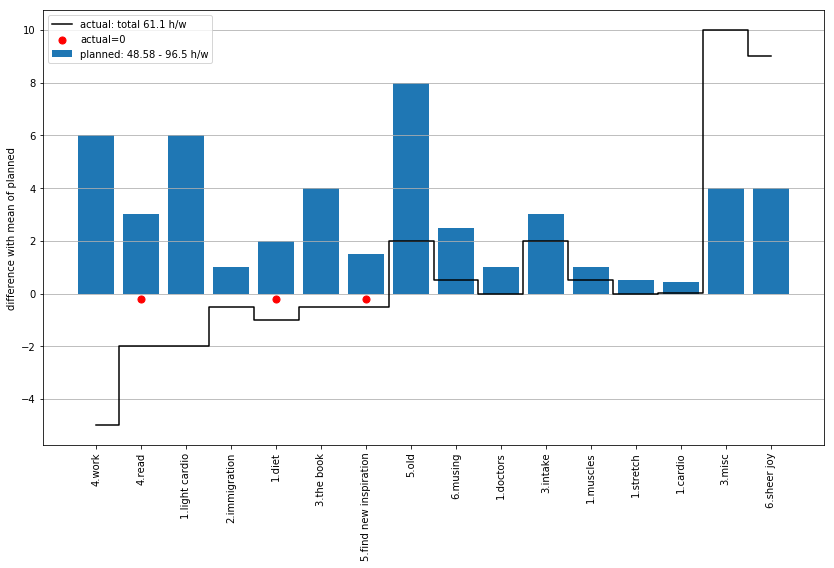

In [99]:
bar_plot_actual_vs_goals(a.table,ax=None)